<a href="https://colab.research.google.com/github/swapnilbpatil/Required-Notebook/blob/main/LR_Insurance_claim_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics

# **Task 1 :- Data loading and splitting**

In [ ]:
df = pd.read_csv("path.csv")

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [ ]:
X = df.drop(columns = 'insuranceclaim')

In [ ]:
X

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [ ]:
y = df['insuranceclaim']

In [ ]:
y

0       1
1       1
2       0
3       0
4       1
       ..
1333    0
1334    1
1335    1
1336    0
1337    1
Name: insuranceclaim, Length: 1338, dtype: int64

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.20,random_state = 6)

In [ ]:
X_train

,age,sex,bmi,children,smoker,region,charges
1182,25,0,30.300,0,0,3,2632.99200
990,26,0,19.800,1,0,3,3378.91000
123,44,1,31.350,1,1,0,39556.49450
184,44,1,30.690,2,0,2,7731.42710
1167,29,0,24.600,2,0,3,4529.47700
...,...,...,...,...,...,...,...
335,64,1,34.500,0,0,3,13822.80300
618,19,0,33.110,0,1,2,34439.85590
227,58,0,41.910,0,0,2,24227.33724
713,20,1,40.470,0,0,0,1984.45330


# **Task 2 :- Outlier Detection**

{'boxes': [<matplotlib.lines.Line2D at 0x7fe1ac4f75d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fe1ac4fd690>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe1ac5036d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fe1ac503190>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fe1ac4f7bd0>,
  <matplotlib.lines.Line2D at 0x7fe1ac4fd150>]}

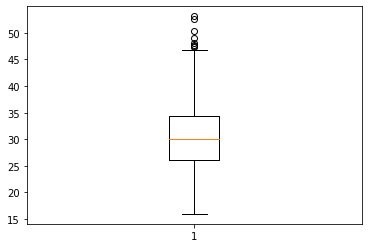

In [ ]:
plt.boxplot(X_train['bmi'])


In [ ]:
q_value = X_train['bmi'].quantile(q=0.95)

{'boxes': [<matplotlib.lines.Line2D at 0x7fe1ac461650>],
 'caps': [<matplotlib.lines.Line2D at 0x7fe1ac467690>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe1ac46f6d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fe1ac46f190>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fe1ac461bd0>,
  <matplotlib.lines.Line2D at 0x7fe1ac467150>]}

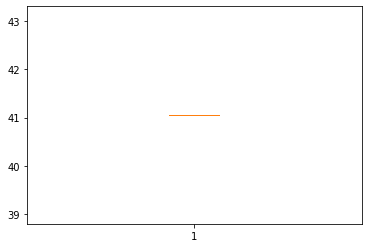

In [ ]:
plt.boxplot(q_value)

In [ ]:
y_train.value_counts()

1    608
0    462
Name: insuranceclaim, dtype: int64

# ***Task 3 :- Correlation Check ***

In [ ]:
relation = X_train.corr()

In [ ]:
relation

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.026319,0.091499,0.061800,-0.012933,0.006400,0.316429
sex,-0.026319,1.000000,0.047436,0.032628,0.074341,0.018674,0.057600
bmi,0.091499,0.047436,1.000000,0.033350,0.005660,0.158037,0.197609
children,0.061800,0.032628,0.033350,1.000000,0.021243,0.027956,0.088766
smoker,-0.012933,0.074341,0.005660,0.021243,1.000000,0.006970,0.778644
region,0.006400,0.018674,0.158037,0.027956,0.006970,1.000000,-0.001329
charges,0.316429,0.057600,0.197609,0.088766,0.778644,-0.001329,1.000000


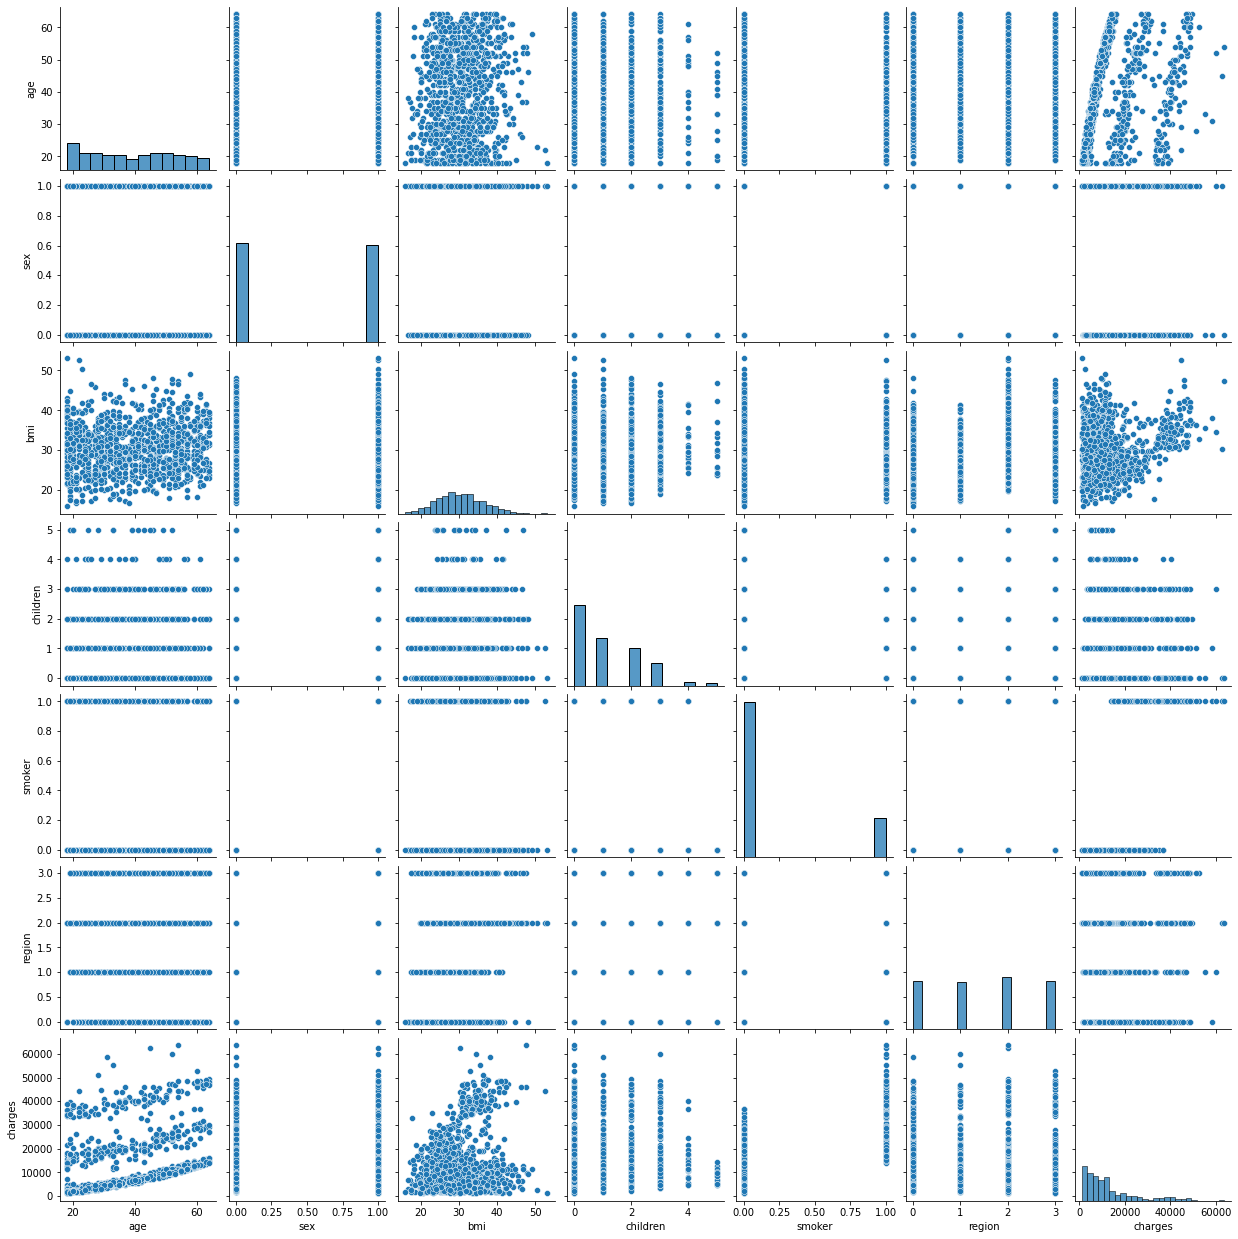

In [ ]:
sns.pairplot(X_train)

# **ask 4 :- Predictor check**

In [ ]:
cols = ['children','sex','region','smoker']

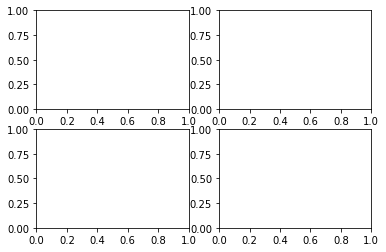

In [ ]:
fig ,axes = plt.subplots(nrows = 2 , ncols = 2)

In [ ]:
for i in range (0,2):
  print(i)
  for j in range (0,2):
    col = cols[ i * 2 + j]
    sns.countplot(x=X_train[col], hue=y_train, ax=axes[i,j])
   

0
1


# **Task 5 :- Is my Insurance claim prediction right**

In [ ]:
# parameters for grid search
parameters = {'C':[0.1,0.5,1,5]}

In [ ]:
lr = LogisticRegression()

In [ ]:
grid = GridSearchCV(estimator=lr, param_grid=parameters)

In [ ]:
grid.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None, param_grid={'C': [0.1, 0.5, 1, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
y_pred = grid.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
accuracy

0.8656716417910447

# **Task 6 :- Performance of a classifier**

In [ ]:
score = roc_auc_score(y_test, y_pred)


In [ ]:
y_pred_proba = grid.predict_proba(X_test)[:,1] 


In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)

In [ ]:
roc_auc = roc_auc_score(y_test, y_pred_proba) 

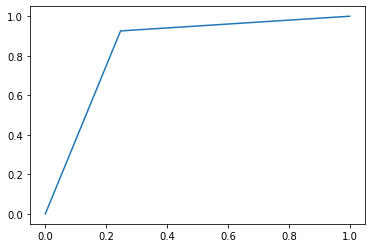

In [ ]:
plt.plot(fpr, tpr, label='Logistic model, auc=' + str(roc_auc)) 
